In [1]:
import os
os.environ["HF_HOME"] = "~/shared/hieunn/huggingface"

In [2]:
from transformers import AutoTokenizer, AutoModel
import torch
import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import math

/home/ubuntu/miniconda3/envs/handbook/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# raw_dataset.rename_columns({"chosen": "text_chosen", "rejected": "text_rejected", "prompt_id": "id"})

In [6]:
# raw_dataset = datasets.load_dataset("/home/ubuntu/hieu.nn/Lang/alignment-handbook/data/spin_data/stablelm-2-1_6b-sft-full/ultrachat_200k_generated/1_61101")

# rewardds = datasets.load_from_disk("/home/ubuntu/hieu.nn/Lang/alignment-handbook/data/spin_data/stablelm-2-1_6b-sft-full/ultrachat_200k_generated/1_61101/reward_results")
# preference_results = torch.tensor(rewardds['results'])
# reward_margins = torch.tensor(rewardds['scores_chosen']) - torch.tensor(rewardds['scores_rejected'])
# preference_results.sum() / len(preference_results)

# reward_ds = raw_dataset['train'].add_column("scores_chosen", rewardds['scores_chosen'])
# reward_ds = reward_ds.add_column("scores_rejected", rewardds['scores_rejected'])
# reward_ds = reward_ds.add_column("results", rewardds['results'])
# raw_dataset['train'] = reward_ds


# reward_ds = raw_dataset['test'].add_column("scores_chosen", [[0.0]])
# reward_ds = reward_ds.add_column("scores_rejected", [[0.0]])
# reward_ds = reward_ds.add_column("results", [0])
# raw_dataset['test'] = reward_ds

# # raw_dataset.push_to_hub("nnheui/stablelm-2-1_6b-sft-full-ultrachat_200k_generated-1_61101")


In [5]:
# raw_dataset = datasets.load_dataset("/home/ubuntu/hieu.nn/Lang/alignment-handbook/data/spin_data/stablelm-2-1_6b-sft-full/ultrafeedback_binarized/0_0")

# rewardds = datasets.load_from_disk("/home/ubuntu/hieu.nn/Lang/alignment-handbook/data/spin_data/stablelm-2-1_6b-sft-full/ultrafeedback_binarized/0_0/reward_results")
# preference_results = torch.tensor(rewardds['results'])
# reward_margins = torch.tensor(rewardds['scores_chosen']) - torch.tensor(rewardds['scores_rejected'])
# preference_results.sum() / len(preference_results)

# reward_ds = raw_dataset['train'].add_column("scores_chosen", rewardds['scores_chosen'])
# reward_ds = reward_ds.add_column("scores_rejected", rewardds['scores_rejected'])
# reward_ds = reward_ds.add_column("results", rewardds['results'])
# raw_dataset['train'] = reward_ds


# reward_ds = raw_dataset['test'].add_column("scores_chosen", [[0.0]])
# reward_ds = reward_ds.add_column("scores_rejected", [[0.0]])
# reward_ds = reward_ds.add_column("results", [0])
# raw_dataset['test'] = reward_ds

# raw_dataset.push_to_hub("nnheui/stablelm-2-1_6b-sft-full-ultrafeedback_generated")


Uploading the dataset shards: 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/nnheui/stablelm-2-1_6b-sft-full-ultrafeedback_generated/commit/6e21032b20c915a3b806a65ec05b32ae582bc263', commit_message='Upload dataset', commit_description='', oid='6e21032b20c915a3b806a65ec05b32ae582bc263', pr_url=None, pr_revision=None, pr_num=None)

In [6]:
raw_dataset = datasets.load_dataset("/home/ubuntu/hieu.nn/Lang/alignment-handbook/data/spin_data/ultrafeedback_binarized/pythia-1.4b-sft-full/pythia-1.4b-sft-full/ultrachat_200k_generated/0_10")

Generating train split: 3 examples [00:00, 686.65 examples/s]
Generating test split: 1 examples [00:00, 245.63 examples/s]


In [ ]:
# model_path = "openbmb/Eurus-RM-7b"
# tokenizer = AutoTokenizer.from_pretrained(model_path)
# model = AutoModel.from_pretrained(model_path, trust_remote_code=True, torch_dtype=torch.float16)
# device = "cpu"
# model.to(device)

(array([1.0000e+01, 9.2000e+01, 6.4900e+02, 6.2790e+03, 1.6859e+04,
        1.8529e+04, 1.5107e+04, 3.3690e+03, 1.9700e+02, 9.0000e+00]),
 array([-1113.5       ,  -812.95001221,  -512.40002441,  -211.8500061 ,
           88.69999695,   389.25      ,   689.79998779,   990.34997559,
         1290.90002441,  1591.44995117,  1892.        ]),
 <BarContainer object of 10 artists>)

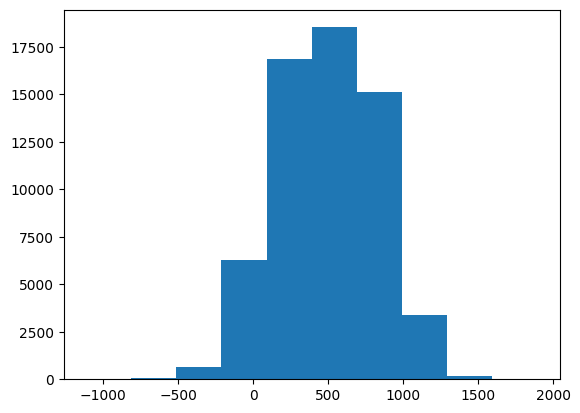

In [8]:
plt.hist(reward_margins.numpy())

(array([1.5000e+01, 1.5100e+02, 1.0570e+03, 7.0600e+03, 1.8134e+04,
        1.6182e+04, 1.1844e+04, 5.3430e+03, 1.2230e+03, 9.1000e+01]),
 array([-1390.        , -1193.69995117,  -997.40002441,  -801.09997559,
         -604.79998779,  -408.5       ,  -212.19999695,   -15.89999962,
          180.3999939 ,   376.70001221,   573.        ]),
 <BarContainer object of 10 artists>)

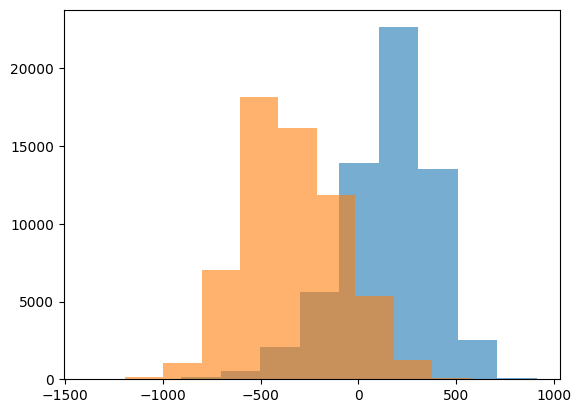

In [11]:
plt.hist(torch.tensor(rewardds['scores_chosen']).squeeze(), alpha=0.6)
plt.hist(torch.tensor(rewardds['scores_rejected']).squeeze(), alpha=0.6)

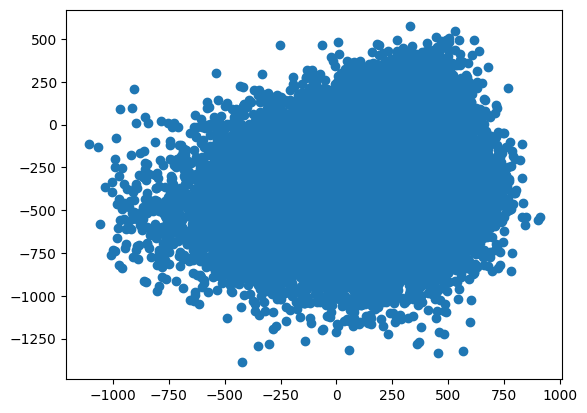

In [10]:
plt.scatter(torch.tensor(rewardds['scores_chosen']).squeeze(), torch.tensor(rewardds['scores_rejected']).squeeze())

In [11]:
sorted_ids = torch.argsort(reward_margins.squeeze(), descending=True).squeeze()

In [22]:
torch.save(reward_margins.squeeze(), "/home/ubuntu/hieu.nn/Lang/alignment-handbook/data/spin_data/stablelm-2-1_6b-sft-full/ultrachat_200k_generated/1_61101/reward_margins.pt")

In [26]:
sub_ds = raw_dataset.select(sorted_ids[:math.ceil(len(sorted_ids) * 0.1)])

In [27]:
sub_ds[0]

{'prompt': 'Provide step-by-step instructions on how to properly apply foundation to achieve a flawless and natural-looking complexion, including recommended tools, techniques, and products.',
 'prompt_id': '00ecf78c58e356e9936fdb1a51bd69c1fda57b98e22eefb8e7e9a91df2664a3e',
 'chosen': [{'content': 'Provide step-by-step instructions on how to properly apply foundation to achieve a flawless and natural-looking complexion, including recommended tools, techniques, and products.',
   'role': 'user'},
  {'content': 'Here are the step-by-step instructions to apply the foundation to achieve a flawless and natural-looking complexion.\n\nStep 1: Start with clean skin. Cleanse your face and apply a lightweight moisturizer to hydrate your skin.\n\nStep 2: Choose the right foundation. Select a foundation that matches your skin tone and skin type. If you have oily skin, opt for a matte finish foundation, while if you have dry skin, use a hydrating or luminous foundation.\n\nStep 3: Prep your skin. U

In [28]:
sub_ds = sub_ds.shuffle(42)
sub_ds[0]

{'prompt': "Write a well-researched informational blog post, using APA style references, that discusses the historical background, cultural significance, and evolution of Valentine's Day traditions around the world. Include information on the origins of the holiday, its development throughout history, and how it is celebrated in different cultures both past and present. Be sure to engage your audience with vivid storytelling, relatable examples, and insights that make your post informative, engaging, and thought-provoking.",
 'prompt_id': '46cd539a0fb43b4fa85aab0714a5a4a6c48c566fcfe7df5da8f3094c87ff545d',
 'chosen': [{'content': "Write a well-researched informational blog post, using APA style references, that discusses the historical background, cultural significance, and evolution of Valentine's Day traditions around the world. Include information on the origins of the holiday, its development throughout history, and how it is celebrated in different cultures both past and present. B

In [12]:
sorted_ids[:]

tensor([17027, 56677, 42513,  ..., 30481, 52060,  4627])

In [16]:
raw_dataset[sorted_ids[1].item()]

{'prompt': 'Create a diverse list of at least 10 quick and healthy meal prep options that can be prepared in advance and stored for easy access throughout the week. The options can include breakfast, lunch, and dinner ideas that incorporate a variety of proteins, vegetables, and grains. Be sure to provide clear instructions on how to prepare and store each meal to help busy moms save time and reduce stress in the kitchen.',
 'prompt_id': '119cbd8a2c7dca75f894a3e38da500798f04177132b1a732b5b660eab4e5c4b2',
 'chosen': [{'content': 'Create a diverse list of at least 10 quick and healthy meal prep options that can be prepared in advance and stored for easy access throughout the week. The options can include breakfast, lunch, and dinner ideas that incorporate a variety of proteins, vegetables, and grains. Be sure to provide clear instructions on how to prepare and store each meal to help busy moms save time and reduce stress in the kitchen.',
   'role': 'user'},
  {'content': '1. Quinoa and 

In [9]:
dataset = [  # cases in webgpt; we use the same template as Mistral-Instruct-v0.2
        {
            "chosen": "[INST] Sural relates to which part of the body? [\INST] The sural region is the muscular swelling of the back of the leg below the knee, formed chiefly by the bellies of the gastrocnemius and soleus muscles [1,2].",
            "rejected": "[INST] Sural relates to which part of the body? [\INST] The Sural nerve runs down the side of the leg near the small saphenous vein, then passes forward below the lateral malleolus and continues on the outside of the foot as the lateral dorsal cutaneous nerve, which then communicates with the intermediate dorsal cutaneous nerve, which branches off to the side of the foot. [1]",
        }
]
def test(tokenizer, model, datasets):
    with torch.no_grad():
        for example in dataset:
            inputs = tokenizer(example["chosen"], return_tensors="pt")
            inputs = inputs.to(device)
            chosen_reward = model(**inputs).item()
            inputs = tokenizer(example["rejected"], return_tensors="pt")
            inputs = inputs.to(device)
            rejected_reward = model(**inputs).item()
            print(chosen_reward - rejected_reward)
test(tokenizer, model, datasets)
# Output: 47.4404296875


RuntimeError: "addmm_impl_cpu_" not implemented for 'Half'